In [1]:
import os
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
from sklearn.datasets import load_files

In [4]:
reviews_train = load_files('aclImdb/train/')

In [5]:
text_train, y_train = reviews_train['data'], reviews_train['target']

In [6]:
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]

In [7]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

In [8]:
len(text_train)

25000

In [9]:
reviews_test = load_files('aclImdb/test/')

In [10]:
text_test, y_test = reviews_test['data'], reviews_test['target']

In [11]:
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

In [12]:
bard_words = ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']

In [13]:
vect = CountVectorizer().fit(bard_words)
vect.vocabulary_, sorted(vect.vocabulary_.items())

({'the': 9,
  'fool': 3,
  'doth': 2,
  'think': 10,
  'he': 4,
  'is': 6,
  'wise': 12,
  'but': 1,
  'man': 8,
  'knows': 7,
  'himself': 5,
  'to': 11,
  'be': 0},
 [('be', 0),
  ('but', 1),
  ('doth', 2),
  ('fool', 3),
  ('he', 4),
  ('himself', 5),
  ('is', 6),
  ('knows', 7),
  ('man', 8),
  ('the', 9),
  ('think', 10),
  ('to', 11),
  ('wise', 12)])

In [14]:
vect.transform(bard_words).toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [16]:
vect.get_feature_names_out()[20000:20100]

array(['draper', 'draperies', 'drapery', 'drapes', 'draskovic', 'drastic',
       'drastically', 'drat', 'dratch', 'dratic', 'dratted', 'draub',
       'draught', 'draughts', 'draughtswoman', 'draw', 'drawback',
       'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl',
       'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea',
       'dread', 'dreadcentral', 'dreaded', 'dreadful', 'dreadfull',
       'dreadfully', 'dreading', 'dreadlocks', 'dreads', 'dreaful',
       'dream', 'dreama', 'dreamboat', 'dreamcast', 'dreamcatcher',
       'dreamcatchers', 'dreamed', 'dreamer', 'dreamers', 'dreamgirl',
       'dreamgirls', 'dreamily', 'dreamin', 'dreaming', 'dreamland',
       'dreamless', 'dreamlike', 'dreamquest', 'dreams', 'dreamscape',
       'dreamscapes', 'dreamstate', 'dreamt', 'dreamtime', 'dreamworks',
       'dreamworld', 'dreamy', 'drearily', 'dreariness', 'dreary',
       'dreck', 'drecky', 'dredd', 'dredge', 'dredged', 'dregs',
       'dreichness', 'd

In [17]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid=param_grid, n_jobs=-1).fit(X_train, y_train)

In [18]:
grid.best_params_

{'C': 0.1}

In [19]:
X_test = vect.transform(text_test)
grid.score(X_test, y_test)

0.87896

In [20]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [21]:
feature_names = vect.get_feature_names_out()
feature_names[:100]

array(['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '100', '1000', '100th', '101', '102',
       '103', '104', '105', '107', '108', '10s', '10th', '11', '110',
       '112', '116', '117', '11th', '12', '120', '12th', '13', '135',
       '13th', '14', '140', '14th', '15', '150', '15th', '16', '160',
       '1600', '16mm', '16s', '16th', '17', '17th', '18', '180', '1800',
       '1800s', '1830', '1840', '1860', '1876', '1880', '1890', '1890s',
       '1895', '1898', '18th', '19', '1900', '1900s', '1902', '1909',
       '1910', '1912', '1913', '1914', '1915', '1916', '1917', '1918',
       '1919', '1920', '1920s', '1921', '1922', '1924', '1925', '1926',
       '1927', '1928', '1929', '1930', '1930s', '1931', '1932', '1933',
       '1934', '1935', '1936', '1937', '1938'], dtype=object)

In [22]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid=param_grid, n_jobs=-1).fit(X_train, y_train)

In [23]:
grid.best_score_, grid.best_params_, grid.score(X_test, y_test)

(0.88812, {'C': 0.1}, 0.8778)

In [24]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [25]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid=param_grid, n_jobs=-1).fit(X_train, y_train)
grid.best_score_, grid.best_params_, grid.score(X_test, y_test)

(0.8828400000000001, {'C': 0.1}, 0.87256)

In [26]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10]}

In [27]:
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1).fit(text_train, y_train)

In [28]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [29]:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
sorted_by_tfidf

array([23668, 10103, 11968, ..., 21090, 23134, 18303], dtype=int64)

In [30]:
feature_names = vectorizer.get_feature_names_out()
feature_names[sorted_by_tfidf[:20]], feature_names[sorted_by_tfidf[-20:]]

(array(['suplexes', 'gauche', 'hypocrites', 'oncoming', 'songwriting',
        'galadriel', 'emerald', 'mclaughlin', 'sylvain', 'oversee',
        'cataclysmic', 'pressuring', 'uphold', 'thieving', 'inconsiderate',
        'ware', 'denim', 'reverting', 'booed', 'spacious'], dtype=object),
 array(['gadget', 'sucks', 'zatoichi', 'demons', 'lennon', 'bye', 'dev',
        'weller', 'sasquatch', 'botched', 'xica', 'darkman', 'woo',
        'casper', 'doodlebops', 'smallville', 'wei', 'scanners', 'steve',
        'pokemon'], dtype=object))

In [31]:
sorted_by_idf = np.argsort(vectorizer.idf_)
feature_names[sorted_by_idf[:20]]

array(['the', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that', 'but',
       'for', 'with', 'was', 'as', 'on', 'movie', 'not', 'have', 'one',
       'be'], dtype=object)

In [32]:
X_train.max(axis=0).toarray()

array([[0.39314587, 0.32476869, 0.33912267, ..., 0.43735711, 0.41781736,
        0.14005376]])

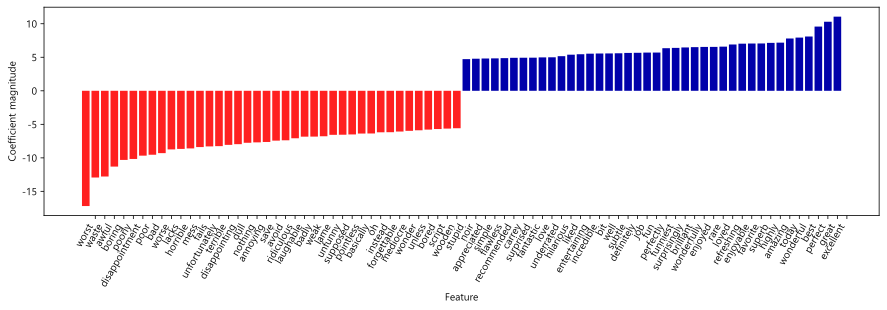

In [33]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0], feature_names, n_top_features=40)

In [34]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bard_words)
cv.get_feature_names_out()

array(['be fool', 'but the', 'doth think', 'fool doth', 'he is',
       'himself to', 'is wise', 'knows himself', 'man knows', 'the fool',
       'the wise', 'think he', 'to be', 'wise man'], dtype=object)

In [35]:
cv.transform(bard_words).toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]], dtype=int64)

In [36]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = param_grid = {'tfidfvectorizer__ngram_range':[(1, 1), (1, 2), (1, 3)], 'logisticregression__C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1).fit(text_train, y_train)

In [37]:
grid.best_score_, grid.best_params_, grid.score(text_test, y_test)

(0.9063599999999999,
 {'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 3)},
 0.90364)

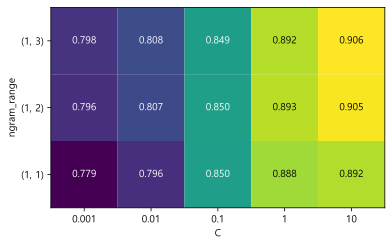

In [38]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
mglearn.tools.heatmap(scores, xlabel='C', ylabel='ngram_range',
                      xticklabels=param_grid['logisticregression__C'], yticklabels=param_grid['tfidfvectorizer__ngram_range'], fmt='%.3f')

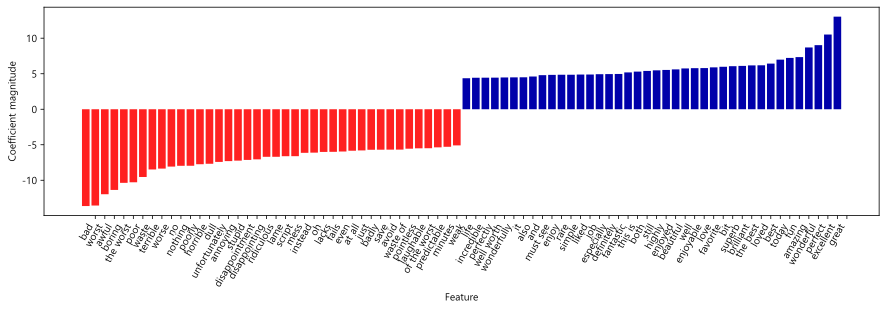

In [39]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = vect.get_feature_names_out()
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

In [40]:
# anaconda powershell prompt에서 설치 필요(python -m spacy download en)
en_nlp = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

In [41]:
doc = "Out meeting today was worse than yesterday, I'm scared of meeting the clients tomorrow."

In [42]:
[token.lemma_ for token in en_nlp(doc)]

['out',
 'meeting',
 'today',
 'be',
 'bad',
 'than',
 'yesterday',
 ',',
 'I',
 'be',
 'scared',
 'of',
 'meet',
 'the',
 'client',
 'tomorrow',
 '.']

In [43]:
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

In [44]:
vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5).fit(text_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [45]:
X_train_lemma = vect.transform(text_train)
X_train_lemma.shape

(25000, 21887)

In [46]:
df_train = pd.read_csv('naver/ratings_train.txt', delimiter='\t', keep_default_na=False)
df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [47]:
text_train, y_train = df_train['document'].values, df_train['label'].values

In [48]:
df_test = pd.read_csv('naver/ratings_test.txt', delimiter='\t', keep_default_na=False)
df_test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [49]:
text_test, y_test = df_test['document'].values, df_test['label'].values

In [50]:
np.bincount(y_train), np.bincount(y_test)

(array([75173, 74827], dtype=int64), array([24827, 25173], dtype=int64))

In [51]:
class PicklableOkt(Okt):
    def __init__(self, *args):
        self.args = args
        Okt.__init__(self, *args)
    def __setstate__(self, state):
        self.__init__(*state['args'])
    def __getstate__(self):
        return {'args':self.args}

In [52]:
okt = PicklableOkt()

In [53]:
param_grid = {'tfidfvectorizer__min_df':[3, 5, 7], 'tfidfvectorizer__ngram_range':[(1, 1), (1, 2), (1, 3)],
             'logisticregression__C':[0.1, 1, 10]}
pipe = make_pipeline(TfidfVectorizer(tokenizer=okt.morphs), LogisticRegression(max_iter=1000))
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1).fit(text_train[:1000], y_train[:1000])

In [54]:
grid.best_score_, grid.best_params_, grid.score(text_test[:1000], y_test[:1000])

(0.718,
 {'logisticregression__C': 1,
  'tfidfvectorizer__min_df': 3,
  'tfidfvectorizer__ngram_range': (1, 3)},
 0.714)

In [58]:
tfidf = grid.best_estimator_.named_steps['tfidfvectorizer'].fit(text_train[:1000])
X_tfidf = tfidf.transform(text_train[:1000])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [63]:
X_tfidf

<1000x1153 sparse matrix of type '<class 'numpy.float64'>'
	with 10712 stored elements in Compressed Sparse Row format>

In [64]:
text_train, y_train = reviews_train['data'], reviews_train['target']
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]
text_test, y_test = reviews_test['data'], reviews_test['target']
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

In [66]:
vect = CountVectorizer(max_features=10000, max_df=0.15).fit(text_train)
X = vect.transform(text_train)

In [68]:
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)
document_topics = lda.fit_transform(X)

In [71]:
lda.components_.shape

(10, 10000)

In [75]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

In [77]:
feature_names = vect.get_feature_names_out()

In [79]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         guy           series        saw           
family        us            comedy        episode       am            
real          american      worst         tv            thought       
beautiful     our           thing         episodes      watched       
both          documentary   re            shows         got           
us            history       stupid        season        book          
each          years         actually      new           now           
work          new           want          musical       10            
performance   human         nothing       years         read          
director      own           laugh         television    years         
makes         point         look          funny         again         
may   

In [91]:
for i in np.argsort(document_topics[:, 1])[::-1][:10]:
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

b"Adolf Hitler's maniacal desire to impose his will on the rest of the world is the subject of this second in a seven part series of films produced by the U.S.\n"
b'I was really looking forward too seeing this movie as it has been advertised as a must-see movie for people that love movies about nature. The movie shows different climates and the animals associated with them by starting at the North Pole and going down south as the movie progresses.\n'
b'The material in this documentary is so powerful that it brought me to tears. Yes, tears I tell you.\n'
b"This documentary film is based on incomplete considerations of the evidence, in which Brian Flemming, perhaps purposely, fails to mention important evidence to the contrary. Perhaps his most crucial mistake is one of the earliest: His claims concerning the invalidity of Paul's testimony about Jesus Christ disregard key facts, like: **The existence of some formulated creeds within Paul's letters.\n"
b'This documentary explores a story 

In [94]:
text_train[1].split(b'.')[:2]

[b"Words can't describe how bad this movie is",
 b" I can't explain it by writing only"]